# Введение в машинное обучение

## Семинар #2

### Polina Polunina
polina.polunina@skolkovotech.ru

## Линейная и логистическая регрессия.

In [3]:
#linear algebra
import numpy as np
#data structures
import pandas as pd
#ml models
import scipy as sp
import sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
#plots
import matplotlib.pyplot as plt
%matplotlib inline
#beautiful plots
import seaborn as sns
#linear regression
import statsmodels.api as sm
#set style for plots
sns.set_style('darkgrid')
#off the warnings
import warnings
warnings.filterwarnings("ignore")

## 1.1 Simple Linear Regression
Simple Linear Regression - regression with one variable

Load the dataset:
* **SalePrice** - The property's sale price in dollars. This is the target variable that you're trying to predict
* **GrLivArea** - Above grade (ground) living area square feet


In [4]:
data = pd.read_csv('train.csv', index_col = 0, usecols=['Id', 'GrLivArea', 'SalePrice'])

Let's have a look into the data:

In [5]:
data.head()

,GrLivArea,SalePrice
Id,,
1,1710,208500
2,1262,181500
3,1786,223500
4,1717,140000
5,2198,250000


In [6]:
data.describe()

,GrLivArea,SalePrice
count,1460.000000,1460.000000
mean,1515.463699,180921.195890
std,525.480383,79442.502883
min,334.000000,34900.000000
25%,1129.500000,129975.000000
50%,1464.000000,163000.000000
75%,1776.750000,214000.000000
max,5642.000000,755000.000000


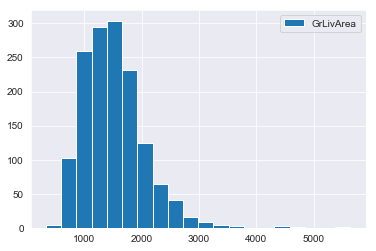

In [7]:
data.GrLivArea.hist(bins=20, label='GrLivArea')
plt.legend()
plt.show()

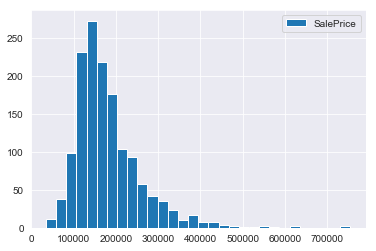

In [8]:
data.SalePrice.hist(bins=30, label='SalePrice')
plt.legend()
plt.show()

In [9]:
data.SalePrice.quantile(0.95)

326099.99999999994

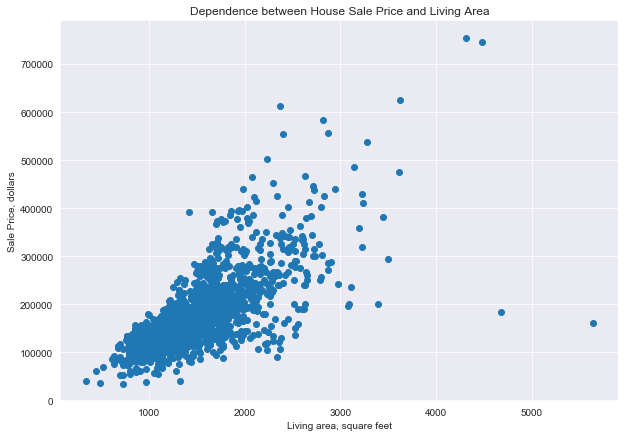

In [10]:
#set figsize of the plot
plt.figure(figsize = (10,7))
#scatter plot of the data
plt.scatter(data.GrLivArea, data.SalePrice)
#text for x axis
plt.xlabel('Living area, square feet')
#text for y axis
plt.ylabel('Sale Price, dollars')
#text for the plot title
plt.title('Dependence between House Sale Price and Living Area')
#show the plot
plt.show()

### How to model this dependence?

### Building a model

* Y = SalePrice - target, dependent variable 
* X = GrLivArea - predictor, independent variable

**the model**

We want to find a line that reflects the dependence between Sale Price and Living area


$Y = a + bX + \epsilon$


In [11]:
X = data.GrLivArea
Y = data.SalePrice
#add the constant term to the data
X = sm.add_constant(X)
#define the model
model = sm.OLS(Y, X)
#fit the model
results = model.fit()

In [12]:
#plot the summary of our model
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.502     
Dependent Variable: SalePrice        AIC:                36073.7610
Date:               2019-04-11 01:46 BIC:                36084.3334
No. Observations:   1460             Log-Likelihood:     -18035.   
Df Model:           1                F-statistic:        1471.     
Df Residuals:       1458             Prob (F-statistic): 4.52e-223 
R-squared:          0.502            Scale:              3.1442e+09
-------------------------------------------------------------------
             Coef.     Std.Err.    t    P>|t|    [0.025    0.975]  
-------------------------------------------------------------------
const      18569.0259 4480.7545  4.1442 0.0000 9779.6119 27358.4399
GrLivArea    107.1304    2.7936 38.3482 0.0000  101.6504   112.6103
-------------------------------------------------------------------
Omnibus:             261.166       Durbin-Watson:          2.025   
Prob(Omnibus):       0.000         Jarque-Bera (JB):       3432.287
Skew:                0.410         Prob(JB):               0.000   
Kurtosis:            10.467        Condition No.:          4897    
===================================================================
* The condition number is large (5e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

### What do all these stats mean?

* **const** - the found value for a
* **GrLivArea** - the found value for b

so that our model is **Y = 18569.0259 + 107.1304 * X**

**Hypothesis testing and *p-value***

$H_0$: coeff = 0 - null hypothesis

$H_1$: coeff $\neq$ 0 - alternative hypothesis

* If *p-value* $\leq$ alpha, then we **CAN** reject the null hypothesis and the coeff is called **significant**
* If *p-value* > alpha, then we **CAN NOT** reject the null hypothesis and the coeff is called **insignificant**
    
    
**How to choose a suitable alpha value?**

Alphas could be: 0.01, 0.05, 0.1 ... 

What is the appropriate false positives and false negatives level?

The most common alpha for coeffs = 0.05

#### How well this relation reflects the dependence?
**Y = 18569.0259 + 107.1304 * X**

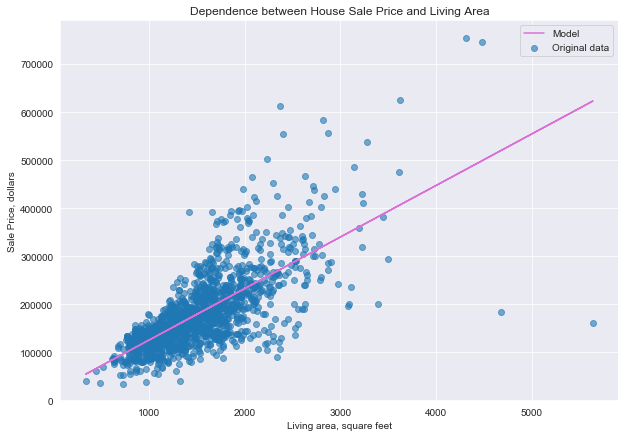

In [13]:
#set size of the plot
plt.figure(figsize = (10,7))
#scatter plot of the data
plt.scatter(data.GrLivArea, data.SalePrice, alpha=0.6, label = 'Original data')
#plot of the found regression line
plt.plot(data.GrLivArea.values, 18569.0259 + 107.1304 * data.GrLivArea.values, color = 'orchid', label='Model')
#text for x axis
plt.xlabel('Living area, square feet')
#text for y axis
plt.ylabel('Sale Price, dollars')
#text for the plot title
plt.title('Dependence between House Sale Price and Living Area')
plt.legend()
#show the plot
plt.show()

#### $R^2$ and Regression Performance

Another recall from you statistics course =)

$R^2$ is the **coefficient of determination**, the most common performance metric for regression problems

In case of linear regression, $R^2$ is defined in the following way:

* $y_i$ - observed target data
* $\hat{y_i}$ - predicted data
* $\overline{y} = \frac{1}{n}\sum_{i=1}^{n}y_i$ - mean of the observed data
* $SS_{tot} = \sum_{i}(y_i - \overline{y})^2$ - total sum of squares
* $SS_{reg} = \sum_{i}(\hat{y_i} - \overline{y})^2$ - explained sum of squares
* $SS_{res} = \sum_{i}(y_i - \hat{y_i})^2 = \sum_{i}residual_i^2$ - residual sum of squares

$R^2 = \frac{SS_{reg}}{SS_{tot}} = 1 - \frac{SS_{res}}{SS_{tot}}$ - the ratio of the explained variance 

$R^2$ range is [0, 1]

In our model, $R^2 = 0.502$, so only a half of the variance is explained

**Note:** $R^2$ is biased (!) and we should look into $R^2_{adjusted}$

### Can we do better?

Let's take logarithms from X and Y, so that our model is **$ln(Y) = a + b*ln(X) + \epsilon$**

In [14]:
X = data.GrLivArea
Y = data.SalePrice
X=np.log(X)
Y=np.log(Y)
#add the constant term to the data
X = sm.add_constant(X)
#define the model
model = sm.OLS(Y, X)
#fit the model
results = model.fit()

In [15]:
#plot the summary of our model
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.533    
Dependent Variable: SalePrice        AIC:                354.1941 
Date:               2019-04-11 01:46 BIC:                364.7664 
No. Observations:   1460             Log-Likelihood:     -175.10  
Df Model:           1                F-statistic:        1666.    
Df Residuals:       1458             Prob (F-statistic): 1.60e-243
R-squared:          0.533            Scale:              0.074523 
--------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
const         5.6681     0.1559   36.3601   0.0000   5.3623   5.9739
GrLivArea     0.8745     0.0214   40.8151   0.0000   0.8325   0.9166
------------------------------------------------------------------
Omnibus:             111.954       Durbin-Watson:          2.022  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       184.755
Skew:                -0.565        Prob(JB):               0.000  
Kurtosis:            4.327         Condition No.:          162    
==================================================================

"""

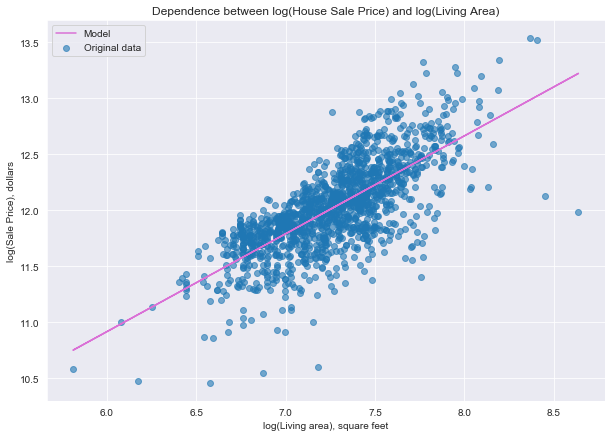

In [16]:
#set size of the plot
plt.figure(figsize = (10,7))
#scatter plot of the data
plt.scatter(np.log(data.GrLivArea), np.log(data.SalePrice), alpha=0.6, label = 'Original data')
#plot of the found regression line
plt.plot(np.log(data.GrLivArea.values), 5.6681 + 0.8745 * np.log(data.GrLivArea.values), color = 'orchid', label='Model')
#text for x axis
plt.xlabel('log(Living area), square feet')
#text for y axis
plt.ylabel('log(Sale Price), dollars')
#text for the plot title
plt.title('Dependence between log(House Sale Price) and log(Living Area)')
plt.legend()
#show the plot
plt.show()

## 1.2 Multiple Linear Regression

In [17]:
cols=['Id', 'MSSubClass', 'LotArea', 'OverallQual',\
      'OverallCond', 'YearBuilt', 'YearRemodAdd',\
      'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',\
     'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',\
     'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',\
     'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',\
     'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',\
     'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

In [18]:
data = pd.read_csv('train.csv', index_col=0, usecols=cols)
data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,150,856,856,854,...,0,61,0,0,0,0,0,2,2008,208500
2,20,9600,6,8,1976,1976,284,1262,1262,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,11250,7,5,2001,2002,434,920,920,866,...,0,42,0,0,0,0,0,9,2008,223500
4,70,9550,7,5,1915,1970,540,756,961,756,...,0,35,272,0,0,0,0,2,2006,140000
5,60,14260,8,5,2000,2000,490,1145,1145,1053,...,192,84,0,0,0,0,0,12,2008,250000


Check for Nan values:

In [19]:
data.isna().sum().sum()

0

### Define the model

In [20]:
X = data.drop('SalePrice', axis=1)
Y = data.SalePrice
#add the constant term to the data
X = sm.add_constant(X)
#define the model
model = sm.OLS(Y, X)
#fit the model
results = model.fit()

Calculate some statistical parameters:

In [21]:
#together with the intercept
k = X.shape[1]
#total number of observations
n = X.shape[0]
#degrees of freedom for the model:
df_model = k - 1
#degrees of freedom of the error:
df_error = n - k
print(' the number of parameters to estimate: {} \n total number of observations: {} \n degrees of freedom of the model: {} \n degrees of freedom of the errors: {}'\
      .format(k, n, df_model, df_error))

 the number of parameters to estimate: 31 
 total number of observations: 1460 
 degrees of freedom of the model: 30 
 degrees of freedom of the errors: 1429


Calculate the rank of feature matrix:

In [22]:
np.linalg.matrix_rank(X)

30

In [21]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                   OLS                  Adj. R-squared:         0.804     
Dependent Variable:      SalePrice            AIC:                    34737.9309
Date:                    2019-04-10 20:03     BIC:                    34896.5166
No. Observations:        1460                 Log-Likelihood:         -17339.   
Df Model:                29                   F-statistic:            207.6     
Df Residuals:            1430                 Prob (F-statistic):     0.00      
R-squared:               0.808                Scale:                  1.2357e+09
--------------------------------------------------------------------------------
                 Coef.      Std.Err.      t    P>|t|      [0.025       0.975]   
--------------------------------------------------------------------------------
const         608246.1995 1428003.7488  0.4259 0.6702 -2192960.6498 3409453.0488
MSSubClass      -161.5055      26.4469 -6.1068 0.0000     -213.3845    -109.6266
LotArea            0.3868       0.1016  3.8079 0.0001        0.1875       0.5860
OverallQual    18012.7658    1194.9364 15.0742 0.0000    15668.7495   20356.7821
OverallCond     4425.5378    1031.1020  4.2920 0.0000     2402.9031    6448.1725
YearBuilt        349.4880      61.2239  5.7084 0.0000      229.3896     469.5863
YearRemodAdd     140.9941      66.3557  2.1248 0.0338       10.8292     271.1590
BsmtUnfSF         -9.7412       3.1432 -3.0991 0.0020      -15.9070      -3.5754
TotalBsmtSF       20.5078       4.5849  4.4729 0.0000       11.5140      29.5016
1stFlrSF          18.9417       6.1645  3.0727 0.0022        6.8492      31.0341
2ndFlrSF          19.5079       5.7011  3.4218 0.0006        8.3244      30.6914
LowQualFinSF      -6.7807      14.8869 -0.4555 0.6488      -35.9831      22.4218
GrLivArea         31.6689       5.7075  5.5486 0.0000       20.4729      42.8650
BsmtFullBath    8400.0052    2512.7996  3.3429 0.0009     3470.8365   13329.1738
FullBath        3414.1786    2838.1391  1.2030 0.2292    -2153.1840    8981.5413
HalfBath       -1549.1048    2690.0026 -0.5759 0.5648    -6825.8793    3727.6697
BedroomAbvGr  -10546.9569    1704.6005 -6.1873 0.0000   -13890.7426   -7203.1712
KitchenAbvGr  -12589.7919    5254.5163 -2.3960 0.0167   -22897.1787   -2282.4051
TotRmsAbvGrd    5095.3485    1250.1490  4.0758 0.0000     2643.0258    7547.6713
Fireplaces      3707.1220    1784.0235  2.0780 0.0379      207.5382    7206.7058
GarageCars     10562.3784    2884.3767  3.6619 0.0003     4904.3150   16220.4418
GarageArea         2.1462       9.7916  0.2192 0.8265      -17.0613      21.3537
WoodDeckSF        25.7208       8.0357  3.2008 0.0014        9.9578      41.4838
OpenPorchSF       -6.2873      15.3029 -0.4109 0.6812      -36.3058      23.7312
EnclosedPorch      6.6916      17.0190  0.3932 0.6942      -26.6932      40.0765
3SsnPorch         21.6727      31.6870  0.6840 0.4941      -40.4854      83.8308
ScreenPorch       55.1441      17.3306  3.1819 0.0015       21.1479      89.1403
PoolArea         -42.4124      23.8035 -1.7818 0.0750      -89.1059       4.2810
MiscVal           -0.8946       1.8753 -0.4770 0.6334       -4.5731       2.7840
MoSold          -111.5227     348.4163 -0.3201 0.7490     -794.9846     571.9391
YrSold          -817.2240     709.7266 -1.1515 0.2497    -2209.4410     574.9931
--------------------------------------------------------------------------------
Omnibus:               540.774        Durbin-Watson:           1.961            
Prob(Omnibus):         0.000          Jarque-Bera (JB):        95836.983        
Skew:                  -0.553         Prob(JB):                0.000            
Kurtosis:              42.676         Condition No.:           13129423541445018
================================================================================
* The c

**Resuls explanation:**

* $R^2 = 0.808$
* $R^2_{adj} = 0.804$
* Log-Likelihood = -1733 - A value of Likelihood function in the optimal point
* AIC = 34738 - Akaike information criterion, is used for model selection purposes. Preferred model is the one with the minimum AIC value
* BIC = 34897 - Bayesian information criterion, the same purposes as for AIC
* F-statistic = 208

**F- Test for the overall model significance**:

$H_{0}$ : The fit of intercept only model and the current model is same. i.e. Additional variables do not provide value taken together

$H_{1}$ : The fit of intercept only model is significantly less compared to our current model. i.e. Additional variables do make the model significantly better.

$F = \frac{R^2/(k-1)}{(1-R^2)/(n-k)}$,

where $k$ - the number of variables (with intercept term), $n$ - the number of observations


If the calculated F-value is greater than the F value from the statistical table, than we can reject the $H_{0}$ hypothesis

* Prob(F-statistic) = 0.0 - P-value for F-test
* Df model - degrees of freedom of the model
* Df Residuals - degrees of freedom of the errors

**Note:** don't be confused with the values of Df (!). THe true values is calculated above. In this specific realization of OLS, DF model is calculated as a rank of the X matrix, which equals to 29

* Scale - squared standard error of the regression

* Durbin-Watson = 1.96; DW is a test for autocorrelation of the errors. DW value always lies between 0 and 4. If , DW << 2 there is a positive serial correlation, if DW >> 2 - there is a negative correlation


**Note:** not all the variables are significant. What should we do next? There is a number of methods (a.k.a. Feature engineering):

* **Elimination by P-value:**

Build a model using a full set of features. Then, eliminate the insignificant features sequentially starting from the one with the highest P-value

* **Forward elimination:**

Build all possible regression models with a single predictor and pick the best one. Then try all possible models that include that best predictor plus a second predictor. Pick the best of those. You keep adding one feature at a time, and you stop when your model no longer improves or starts worsening. 

* **Backward elimination:**

Build a regression model that includes a full set of predictors. Next, gradually remove one at a time according to the predictor whose removal makes the biggest improvement. You stop removing predictors when the removal makes the predictive model worsen.

### Task 1: 

* Find collinear variables and leave only one of them 

**Solution**

We have 30 features in total. And the rank of the feature matrix X should be also 30. Let's check this:

In [63]:
X = data.drop(['SalePrice'], axis=1)

In [74]:
print('Total number of features (without the constant term): {}'.format(X.shape[1]))

Total number of features (without the constant term): 30


In [69]:
print('Rank = {}'.format(np.linalg.matrix_rank(X)))

Rank = 29


As we can see, the number of features is greater then the matrix rank. This means that there are some features that are linearly dependent. We need to find these features and eliminate one of them.

First, let's have a look into the correlation matrix heatmap:

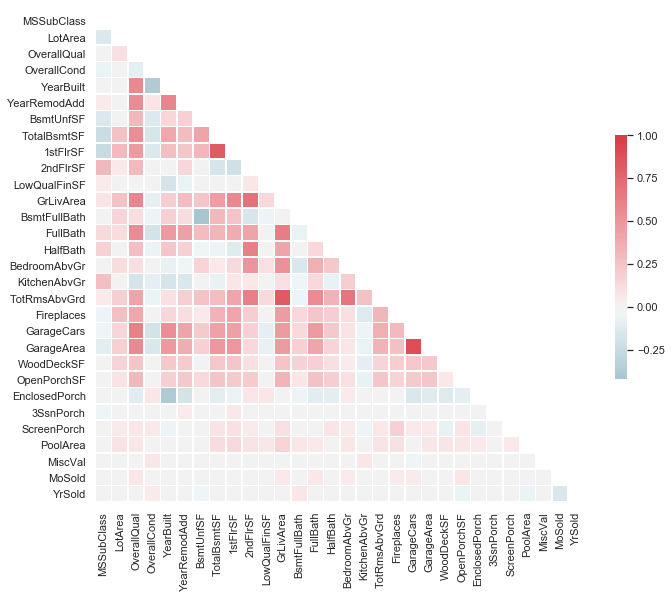

In [56]:
dt=data.drop('SalePrice', axis=1)
sns.set(style="white")

# Compute the correlation matrix
corr = dt.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Looks like there are 3 pairs of highly correlated features:
* 'GarageCars' and 'GarageArea' 
* 'TotRmsAbvGrd' and 'GrLivArea'
* '1stFlrSF' and 'TotalBsmtSF'

Let's check the correlation:

In [57]:
# correlation between the pairs
corr.GarageCars[corr.index == 'GarageArea']

GarageArea    0.882475
Name: GarageCars, dtype: float64

In [58]:
corr.TotRmsAbvGrd[corr.index == 'GrLivArea']

GrLivArea    0.825489
Name: TotRmsAbvGrd, dtype: float64

In [59]:
corr['1stFlrSF'][corr.index == 'TotalBsmtSF']

TotalBsmtSF    0.81953
Name: 1stFlrSF, dtype: float64

There are no pairs with corr = 1. Then, how to find the linearly dependent features?

In [117]:
sum_of_three_features = data.PoolArea + data['1stFlrSF'] + data['2ndFlrSF']
sum_of_three_features.head()

Id
1    1710
2    1262
3    1786
4    1717
5    2198
dtype: int64

In [118]:
data.GrLivArea.head()

Id
1    1710
2    1262
3    1786
4    1717
5    2198
Name: GrLivArea, dtype: int64

In [123]:
sum_of_three_features.all() == data.GrLivArea.all()

True

**GrLivArea** is a sum of **PoolArea**, **1stFlrSF**, **2ndFlrSF**. So. we need to eliminate **GrLivArea**

In [135]:
X = data.drop(['SalePrice', 'GrLivArea'], axis=1)
Y = data.SalePrice
#add the constant term to the data
X = sm.add_constant(X)
#define the model
model = sm.OLS(Y, X)
#fit the model
results = model.fit()

In [125]:
np.linalg.matrix_rank(X)

30

In [126]:
X.shape[1]

30

In [127]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                   OLS                  Adj. R-squared:         0.804     
Dependent Variable:      SalePrice            AIC:                    34737.9309
Date:                    2019-04-10 21:37     BIC:                    34896.5166
No. Observations:        1460                 Log-Likelihood:         -17339.   
Df Model:                29                   F-statistic:            207.6     
Df Residuals:            1430                 Prob (F-statistic):     0.00      
R-squared:               0.808                Scale:                  1.2357e+09
--------------------------------------------------------------------------------
                 Coef.      Std.Err.      t    P>|t|      [0.025       0.975]   
--------------------------------------------------------------------------------
const         608246.1995 1428003.7488  0.4259 0.6702 -2192960.6498 3409453.0488
MSSubClass      -161.5055      26.4469 -6.1068 0.0000     -213.3845    -109.6266
LotArea            0.3868       0.1016  3.8079 0.0001        0.1875       0.5860
OverallQual    18012.7658    1194.9364 15.0742 0.0000    15668.7495   20356.7821
OverallCond     4425.5378    1031.1020  4.2920 0.0000     2402.9031    6448.1725
YearBuilt        349.4880      61.2239  5.7084 0.0000      229.3896     469.5863
YearRemodAdd     140.9941      66.3557  2.1248 0.0338       10.8292     271.1590
BsmtUnfSF         -9.7412       3.1432 -3.0991 0.0020      -15.9070      -3.5754
TotalBsmtSF       20.5078       4.5849  4.4729 0.0000       11.5140      29.5016
1stFlrSF          50.6106       5.8085  8.7132 0.0000       39.2166      62.0046
2ndFlrSF          51.1768       4.9817 10.2730 0.0000       41.4047      60.9490
LowQualFinSF      24.8883      19.9110  1.2500 0.2115      -14.1697      63.9462
BsmtFullBath    8400.0052    2512.7996  3.3429 0.0009     3470.8365   13329.1738
FullBath        3414.1786    2838.1391  1.2030 0.2292    -2153.1840    8981.5413
HalfBath       -1549.1048    2690.0026 -0.5759 0.5648    -6825.8793    3727.6697
BedroomAbvGr  -10546.9569    1704.6005 -6.1873 0.0000   -13890.7426   -7203.1712
KitchenAbvGr  -12589.7919    5254.5163 -2.3960 0.0167   -22897.1787   -2282.4051
TotRmsAbvGrd    5095.3485    1250.1490  4.0758 0.0000     2643.0258    7547.6713
Fireplaces      3707.1220    1784.0235  2.0780 0.0379      207.5382    7206.7058
GarageCars     10562.3784    2884.3767  3.6619 0.0003     4904.3150   16220.4418
GarageArea         2.1462       9.7916  0.2192 0.8265      -17.0613      21.3537
WoodDeckSF        25.7208       8.0357  3.2008 0.0014        9.9578      41.4838
OpenPorchSF       -6.2873      15.3029 -0.4109 0.6812      -36.3058      23.7312
EnclosedPorch      6.6916      17.0190  0.3932 0.6942      -26.6932      40.0765
3SsnPorch         21.6727      31.6870  0.6840 0.4941      -40.4854      83.8308
ScreenPorch       55.1441      17.3306  3.1819 0.0015       21.1479      89.1403
PoolArea         -42.4124      23.8035 -1.7818 0.0750      -89.1059       4.2810
MiscVal           -0.8946       1.8753 -0.4770 0.6334       -4.5731       2.7840
MoSold          -111.5227     348.4163 -0.3201 0.7490     -794.9846     571.9391
YrSold          -817.2240     709.7266 -1.1515 0.2497    -2209.4410     574.9931
--------------------------------------------------------------------------------
Omnibus:                 540.774           Durbin-Watson:              1.961    
Prob(Omnibus):           0.000             Jarque-Bera (JB):           95836.983
Skew:                    -0.553            Prob(JB):                   0.000    
Kurtosis:                42.676            Condition No.:              22951016 
================================================================================
* The condition number is large (2e+07). This might indicate             strong
multicol

In [24]:
X = data.drop(['SalePrice', 'GrLivArea'], axis=1)
Y = data.SalePrice
#add the constant term to the data
X = sm.add_constant(X)
#define the model
model = sm.OLS(Y, X)
#fit the model
results = model.fit_regularized(method='elastic_net')

In [31]:
results.params

const            180948.775835
MSSubClass         -127.622608
LotArea               0.305651
OverallQual       16987.082244
OverallCond       -3259.203117
YearBuilt           -38.688357
YearRemodAdd          0.065364
BsmtUnfSF           -14.974283
TotalBsmtSF          41.316682
1stFlrSF             43.881721
2ndFlrSF             58.306822
LowQualFinSF         -1.964917
BsmtFullBath       5488.545243
FullBath           9119.596365
HalfBath           -988.546573
BedroomAbvGr     -18461.728228
KitchenAbvGr     -46388.341003
TotRmsAbvGrd       6312.164941
Fireplaces          548.901291
GarageCars        13378.418367
GarageArea           -1.823197
WoodDeckSF           27.823069
OpenPorchSF         -11.369265
EnclosedPorch       -45.963582
3SsnPorch            25.214816
ScreenPorch          38.827606
PoolArea            -49.667080
MiscVal               0.648200
MoSold              -91.385910
YrSold              -45.722478
dtype: float64

### Task 2: Implement feature elimination by P-value

**Hints**:
    * use cycles
    * look to the score values (Note: R^2 is biased) and P-values of the corresponding coefficients
    * constant term should be included 
    
**Note:** The insignificant variable in a model could become significant in another model and vice versa

**Note 2:** Two estimated models with different features are two distinct models (!)

In [136]:
cols2 = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF',\
         'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',\
 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',\
 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [137]:
# choose alpha level
alpha = 0.05

# perform feature elimination
while results.pvalues[results.pvalues > 0.05].shape[0] > 0:
    use_cols=results.pvalues[results.pvalues != results.pvalues.max()].keys().tolist()
    X = X[use_cols]
    Y = data.SalePrice
    #define the model
    model = sm.OLS(Y, X)
    #fit the model
    results = model.fit()
    #print the results
    print(results.summary2())
    print('\n\n\n')

                        Results: Ordinary least squares
Model:                   OLS                  Adj. R-squared:         0.804     
Dependent Variable:      SalePrice            AIC:                    34735.9799
Date:                    2019-04-10 21:38     BIC:                    34889.2795
No. Observations:        1460                 Log-Likelihood:         -17339.   
Df Model:                28                   F-statistic:            215.2     
Df Residuals:            1431                 Prob (F-statistic):     0.00      
R-squared:               0.808                Scale:                  1.2349e+09
--------------------------------------------------------------------------------
                 Coef.      Std.Err.      t    P>|t|      [0.025       0.975]   
--------------------------------------------------------------------------------
const         603347.7338 1427353.8588  0.4227 0.6726 -2196582.6179 3403278.0856
MSSubClass      -161.9840      26.3479 -6.1479 0.0000

                     Results: Ordinary least squares
Model:                OLS                Adj. R-squared:       0.968     
Dependent Variable:   SalePrice          AIC:                  34730.3905
Date:                 2019-04-10 21:38   BIC:                  34867.8314
No. Observations:     1460               Log-Likelihood:       -17339.   
Df Model:             26                 F-statistic:          1723.     
Df Residuals:         1434               Prob (F-statistic):   0.00      
R-squared:            0.969              Scale:                1.2326e+09
-------------------------------------------------------------------------
                 Coef.     Std.Err.    t    P>|t|     [0.025     0.975]  
-------------------------------------------------------------------------
MSSubClass      -160.9088   26.2669 -6.1259 0.0000   -212.4344  -109.3831
LotArea            0.3882    0.1014  3.8289 0.0001      0.1893     0.5871
OverallQual    17957.1028 1189.2546 15.0995 0.0000  15624.2

strong multicollinearity or other numerical problems.




                    Results: Ordinary least squares
Model:                 OLS               Adj. R-squared:      0.968     
Dependent Variable:    SalePrice         AIC:                 34725.2300
Date:                  2019-04-10 21:38  BIC:                 34846.8124
No. Observations:      1460              Log-Likelihood:      -17340.   
Df Model:              23                F-statistic:         1951.     
Df Residuals:          1437              Prob (F-statistic):  0.00      
R-squared:             0.969             Scale:               1.2308e+09
------------------------------------------------------------------------
                Coef.     Std.Err.    t    P>|t|     [0.025     0.975]  
------------------------------------------------------------------------
MSSubClass     -160.7198   26.2301 -6.1273 0.0000   -212.1733  -109.2664
LotArea           0.3860    0.1011  3.8167 0.0001      0.1876     0.5844
OverallQual   

                    Results: Ordinary least squares
Model:                 OLS               Adj. R-squared:      0.968     
Dependent Variable:    SalePrice         AIC:                 34726.4699
Date:                  2019-04-10 21:38  BIC:                 34821.6214
No. Observations:      1460              Log-Likelihood:      -17345.   
Df Model:              18                F-statistic:         2482.     
Df Residuals:          1442              Prob (F-statistic):  0.00      
R-squared:             0.969             Scale:               1.2360e+09
------------------------------------------------------------------------
                Coef.     Std.Err.    t    P>|t|     [0.025     0.975]  
------------------------------------------------------------------------
MSSubClass     -154.9909   26.0905 -5.9405 0.0000   -206.1703  -103.8115
LotArea           0.4183    0.1004  4.1667 0.0000      0.2214     0.6153
OverallQual   18577.5690 1170.0852 15.8771 0.0000  16282.3176 20872.8205

In [143]:
print('.............................Final Results..............................')
print(results.summary2())

.............................Final Results..............................
                    Results: Ordinary least squares
Model:                 OLS               Adj. R-squared:      0.968     
Dependent Variable:    SalePrice         AIC:                 34726.4699
Date:                  2019-04-10 21:40  BIC:                 34821.6214
No. Observations:      1460              Log-Likelihood:      -17345.   
Df Model:              18                F-statistic:         2482.     
Df Residuals:          1442              Prob (F-statistic):  0.00      
R-squared:             0.969             Scale:               1.2360e+09
------------------------------------------------------------------------
                Coef.     Std.Err.    t    P>|t|     [0.025     0.975]  
------------------------------------------------------------------------
MSSubClass     -154.9909   26.0905 -5.9405 0.0000   -206.1703  -103.8115
LotArea           0.4183    0.1004  4.1667 0.0000      0.2214     0.6153

## 2. Logistic Regression

Load the dataset:

In [144]:
X, Y = sklearn.datasets.load_iris(return_X_y=True)
names = ['sepal length', 'sepal width', 'petal length', 'petal width']
classes = ['setosa', 'versicolor', 'virginica']
#create pandas object
X = pd.DataFrame(X, columns=names)
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Target variable is already encoded:
    * 0 - Setosa
    * 1 - Versicolor
    * 2 - Verginica

Data statistics:

In [37]:
X.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


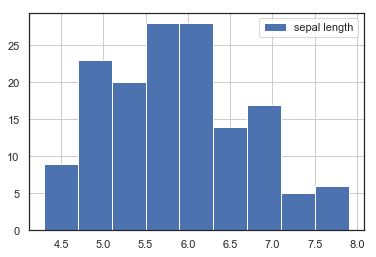

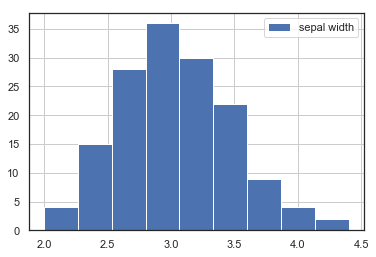

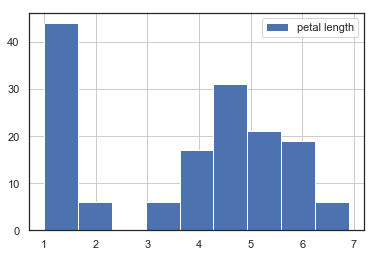

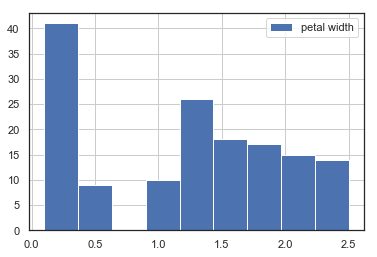

In [38]:
for name in names:
    X[name].hist(bins=9, label=name)
    plt.legend()
    plt.show()

Correlation:

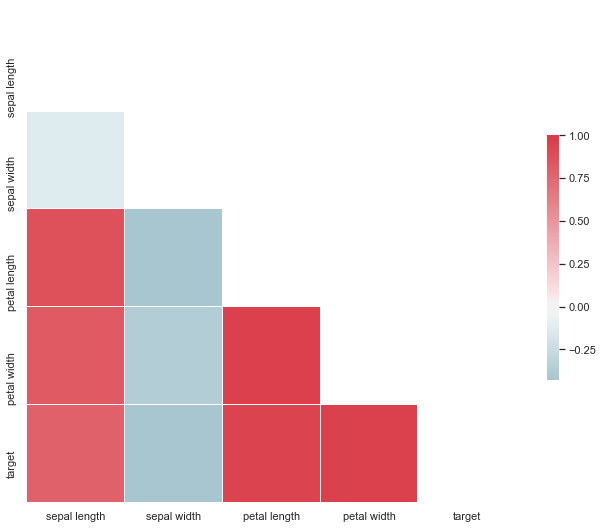

In [145]:
dt=pd.concat([X,pd.DataFrame(Y, columns=['target'])], axis=1)
sns.set(style="white")

# Compute the correlation matrix
corr = dt.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Another nice plots:

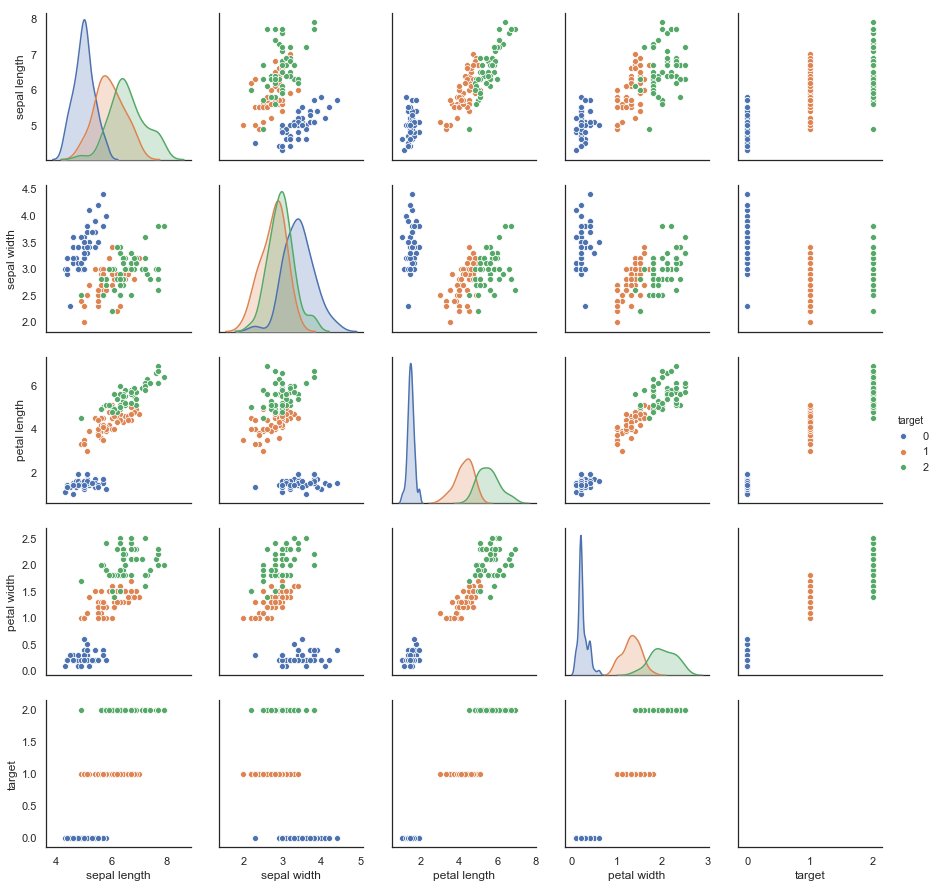

In [148]:
sns.pairplot(dt, kind='scatter', hue='target')
plt.show()

[]

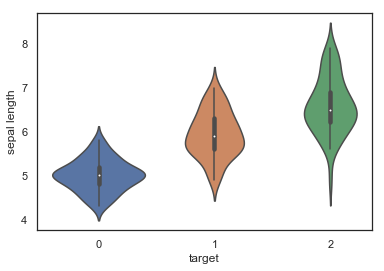

In [41]:
sns.violinplot( x=dt["target"], y=dt["sepal length"])
plt.plot()

Rank of the features matrix:

In [149]:
np.linalg.matrix_rank(X)

4

In [150]:
#from sklearn import metrics 
logit = sm.MNLogit(Y, X)
result = logit.fit()
preds=np.argmax(result.predict(X).values,axis=1)
accuracy_score(Y,preds)

         Current function value: 0.072266
         Iterations: 35


0.9666666666666667

**Logistic regression with L1 regularization**

In [44]:
from sklearn import linear_model
model=sklearn.linear_model.LogisticRegression(penalty='l1',multi_class='multinomial', solver='saga').fit(X,Y)
preds=model.predict(X)
accuracy_score(Y, preds)

0.98

**Logistic regression with L2 regularization**

In [45]:
from sklearn import linear_model
model=sklearn.linear_model.LogisticRegression(penalty='l2',multi_class='multinomial', solver='saga', fit_intercept=True).fit(X,Y)
preds=model.predict(X)
accuracy_score(Y, preds)

0.9866666666666667

In [46]:
solvers=['newton-cg', 'sag', 'saga', 'lbfgs']
for solver in solvers:
    model=sklearn.linear_model.LogisticRegression(penalty='l2',multi_class='multinomial', solver=solver, fit_intercept=True).fit(X,Y)
    preds=model.predict(X)
    print(solver, accuracy_score(Y, preds))

newton-cg 0.9733333333333334
sag 0.9866666666666667
saga 0.9866666666666667
lbfgs 0.9733333333333334


### Analysing the results

**Visuas analysis**

### Task 3: 
* make scatter plots of any two variables from X
    * a) use true target labels as colors
    * b) use predicted labels as colors
    
**Hint:** use sns.lmplot  

* find at least 2 datapoints that was incorrectly classified

True values:

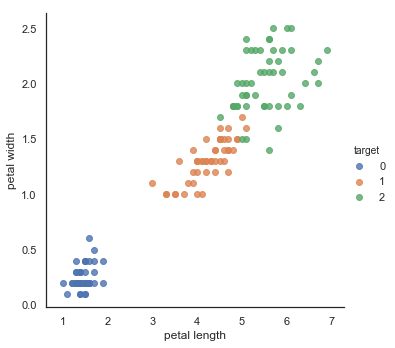

In [47]:
sns.lmplot('petal length', 'petal width', dt, hue='target', scatter=True, fit_reg=False)

Predictions:

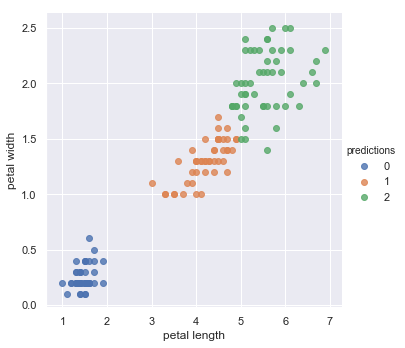

In [48]:
df=pd.concat([X, pd.DataFrame(preds, columns=['predictions'])], axis=1)
sns.set_style('darkgrid')
sns.lmplot('petal length', 'petal width', df, hue='predictions', scatter=True, fit_reg=False)

**Confusion matrix**

### Task 4:
* read about confusion matrix (https://en.wikipedia.org/wiki/Confusion_matrix)
* calculate and plot confusion matrix (https://scikit-learn.org/0.20/auto_examples/model_selection/plot_confusion_matrix.html)

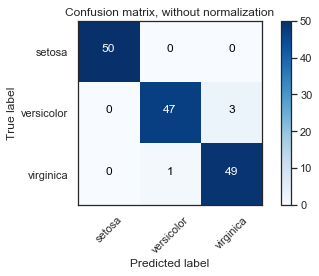

In [49]:
import itertools
from sklearn.metrics import confusion_matrix
sns.set_style('white')
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y, preds)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes,\
                      title='Confusion matrix, without normalization')

plt.show()

### Task 5: Estimate (any) logistic regression model for two classes: versicolor and virginica
    * 0) plot the dependence between two variables and color them by the target labels    
    * a) form new dataset i.e. remove features setosa from the data
    * b) estimate the model
    * c) print accuracy score

**plot the dependence between two variables and color them by the target labels**

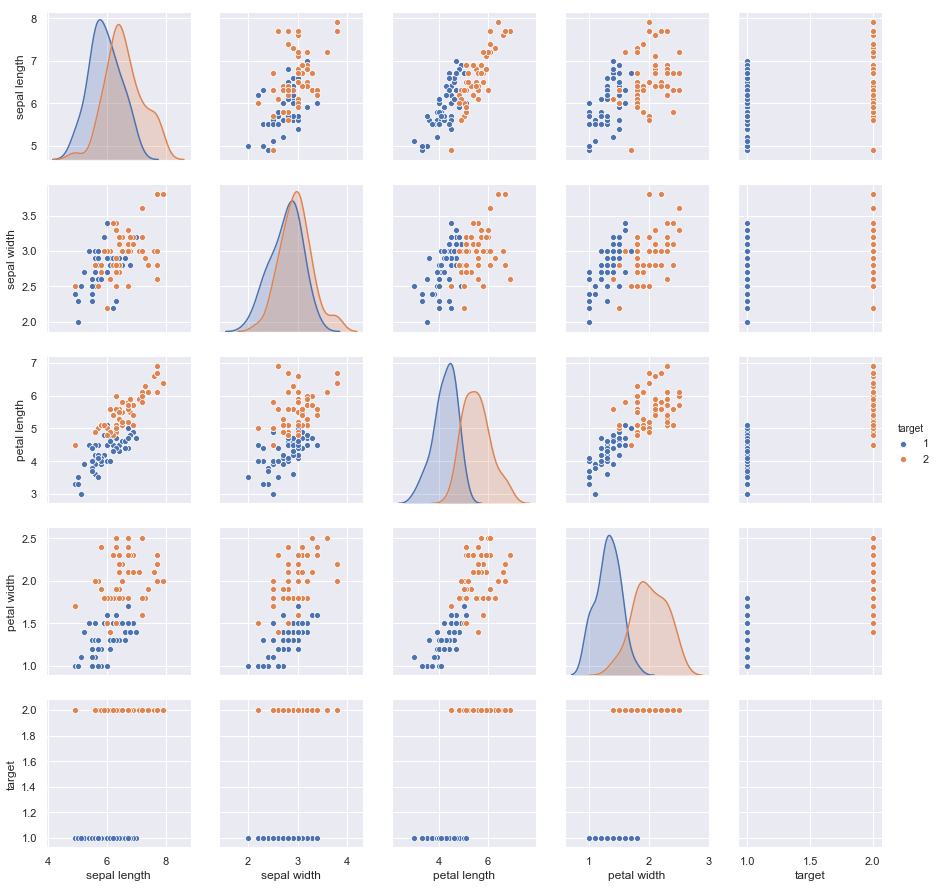

In [157]:
sns.pairplot(dt[dt.target.isin([1,2])], kind ='scatter', hue='target')
plt.show()

**form new dataset i.e. remove features setosa from the data**

In [161]:
X = dt[dt.target.isin([1,2])].drop('target', axis=1)
Y = dt[dt.target.isin([1,2])].target

**estimate the model**

In [174]:
#from sklearn import metrics 
logit = sm.Logit(Y-1, X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.108399
         Iterations 10


**print accuracy score**

In [195]:
# get the predicted probabilities
probabilities = result.predict(X).values
# transform probabilities into predictions
preds = np.zeros(probabilities.shape)
preds[probabilities > 0.5] = 1

In [196]:
accuracy_score(Y-1,preds)

0.95